## Baseline 2
#### Simple CNN network using tensorflow img classification tutorial
https://www.tensorflow.org/tutorials/images/classification

In [127]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [128]:
file = '../data/home_sale_data_324_features_5_classes.csv'

data = pd.read_csv(file)

'''suffle rows randomly'''
data = data.sample(frac=1)

labels = data['label']

data

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,...,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3,label
1104,198.333330,163.622390,94.665440,153.0,83.574490,147.721770,240.236850,146.032440,178.194520,243.913040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hi
835,141.666670,142.265060,75.952810,51.0,42.068770,68.548386,60.394737,53.449783,92.532520,97.934784,...,255.0,255.0,255.0,255.0,0.0,255.0,0.0,0.0,0.0,low-mid
2594,85.000000,102.859710,55.379610,51.0,41.787247,50.897180,147.631580,42.155334,48.196250,181.086960,...,255.0,0.0,0.0,255.0,255.0,255.0,0.0,0.0,0.0,low
1882,85.000000,117.189026,52.297775,51.0,41.787247,93.225810,135.552630,80.651900,129.112580,162.608690,...,255.0,0.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,low-mid
408,113.333336,127.479500,65.799510,51.0,0.281522,59.979840,115.421050,101.490950,140.087300,158.913040,...,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,113.333336,136.345600,54.258150,0.0,42.068770,0.000000,96.631580,52.495320,120.674416,145.978260,...,255.0,0.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,low
997,198.333330,148.246890,81.161156,153.0,42.068770,141.209670,244.263150,125.193390,162.066010,247.608690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hi
361,141.666670,102.368800,55.587980,51.0,22.608002,45.241936,199.973680,38.417030,38.497140,184.782610,...,0.0,255.0,255.0,255.0,0.0,255.0,0.0,0.0,0.0,low
2200,170.000000,180.028980,101.490974,102.0,105.900980,86.713710,161.052630,66.175920,135.217180,144.130430,...,255.0,0.0,255.0,0.0,0.0,255.0,0.0,0.0,0.0,hi


In [129]:
# drop label column
data.drop(['label'], axis=1, inplace=True)
data.describe()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,...,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,...,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.0,2911.0,2911.0
mean,144.109700,138.404628,74.824803,90.051529,51.220054,80.907761,168.506825,83.310003,124.439034,183.490209,...,68.064239,154.436620,107.571281,112.038818,124.215046,130.522157,157.239780,0.0,0.0,0.0
std,39.776944,31.924177,30.541911,38.822241,33.925875,36.713832,61.885018,33.642103,33.499042,55.934470,...,112.818495,124.643514,125.954540,126.580828,127.479574,127.486077,124.004346,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,113.333336,115.167130,54.456920,51.000000,22.608002,54.838710,120.789474,63.034155,100.725810,150.597830,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,141.666670,139.690810,71.993030,102.000000,42.068770,82.258064,166.421050,78.583910,122.824270,186.630430,...,0.000000,255.000000,0.000000,0.000000,0.000000,255.000000,255.000000,0.0,0.0,0.0
75%,170.000000,158.418060,90.894060,102.000000,64.395250,98.709680,230.842100,103.399870,148.556260,238.369570,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,0.0,0.0,0.0
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,0.0,0.0,0.0


In [130]:
labels.unique()

array(['hi', 'low-mid', 'low', 'mid', 'mid-hi'], dtype=object)

In [131]:
'''one-hot encode the labels'''

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
# print(list(integer_encoded))

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)

print(labels)

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [132]:
'''test reshape'''
# tmp = [[1,2,3,4], [5,6, 7,8], [9,10,11,12]]
# tmp = np.array(tmp)
# tmp.shape
# tmp.reshape(3,2,2)


'test reshape'

In [133]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

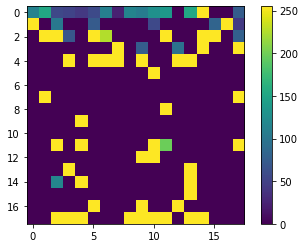

In [134]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18,18)
plt.imshow(a11)
plt.colorbar()
plt.show()

In [135]:
labels.shape

(2911, 5)

In [136]:
train_examples = data_np
train_examples.shape

(2911, 18, 18)

In [137]:
ttl_samples = train_examples.shape[0] 
val_ratio = 0.2
val_samples = int(val_ratio * train_examples.shape[0])

val_examples = train_examples[-1*val_samples:]
train_examples = train_examples[:-1*val_samples]
val_labels = labels[-1*val_samples:]
train_labels = labels[:-1*val_samples]

# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))

In [138]:
print('train: ', train_examples.shape)
print('validation: ', val_examples.shape)

train:  (2329, 18, 18)
validation:  (582, 18, 18)


In [139]:
trainX = train_examples.reshape(ttl_samples-val_samples, 18,18,1)
trainY = train_labels

testX = val_examples.reshape(val_samples, 18,18,1)
testY = val_labels


In [140]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [175]:
BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 64
epochs = 80

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)

num_classes = 5

# Working
with tf.device('/cpu:0'):
	data_augmentation = tf.keras.Sequential([ 
		tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
  		tf.keras.layers.RandomRotation(0.1),
	    tf.keras.layers.RandomZoom(0.1)
		])


model = tf.keras.Sequential([
	# data_augmentation,
  	# tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  	tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(18, 18, 1)),
	tf.keras.layers.MaxPooling2D((2, 2)),
	tf.keras.layers.Dropout(0.1),
	tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  	tf.keras.layers.MaxPooling2D((2,2)),
	tf.keras.layers.Dropout(0.1),
  	tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Dropout(0.1),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])

# opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
opt = tf.keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [169]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 18, 18, 16)        160       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 9, 9, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 2, 2, 64)       

In [176]:
#CPU
with tf.device('/CPU:0'):
    history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)

# deafult go with GPU
# history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)

Epoch 1/80
12/37 [========>.....................] - ETA: 0s - loss: 13.1196 - accuracy: 0.2318

2022-04-23 16:00:07.170419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 1s 14ms/step - loss: 5.3314 - accuracy: 0.2765 - val_loss: 1.2323 - val_accuracy: 0.4588
Epoch 2/80
12/37 [========>.....................] - ETA: 0s - loss: 1.2867 - accuracy: 0.4219

2022-04-23 16:00:07.666747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 0s 12ms/step - loss: 1.2332 - accuracy: 0.4354 - val_loss: 1.0629 - val_accuracy: 0.4536
Epoch 3/80
37/37 [==============================] - 0s 12ms/step - loss: 1.1296 - accuracy: 0.4702 - val_loss: 1.0822 - val_accuracy: 0.5069
Epoch 4/80
37/37 [==============================] - 0s 13ms/step - loss: 1.0890 - accuracy: 0.4908 - val_loss: 0.9785 - val_accuracy: 0.5756
Epoch 5/80
37/37 [==============================] - 1s 14ms/step - loss: 1.0046 - accuracy: 0.5505 - val_loss: 0.8975 - val_accuracy: 0.5825
Epoch 6/80
37/37 [==============================] - 0s 12ms/step - loss: 1.0234 - accuracy: 0.5303 - val_loss: 0.9957 - val_accuracy: 0.5498
Epoch 7/80
37/37 [==============================] - 0s 12ms/step - loss: 0.9622 - accuracy: 0.5698 - val_loss: 0.8564 - val_accuracy: 0.6220
Epoch 8/80
37/37 [==============================] - 0s 13ms/step - loss: 0.9361 - accuracy: 0.5766 - val_loss: 1.0336 - val_accuracy: 0.5206
Epoch 9/80
37/37 [======

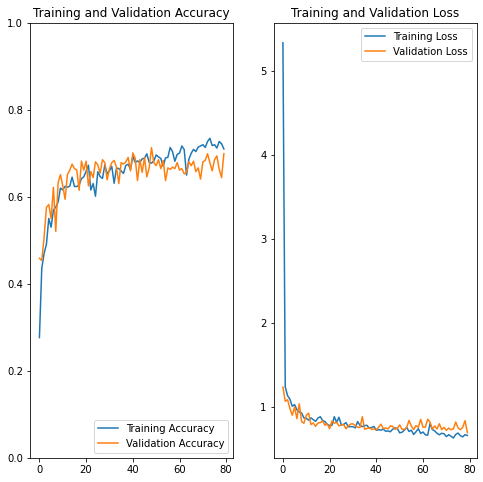

In [177]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [126]:
%reset -f

In [ ]:
model.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.6444 - sparse_categorical_accuracy: 0.9575


[0.6444269418716431, 0.9575000405311584]

In [ ]:
# epochs = 25
# # history = model.fit(train_dataset, epochs=epochs, validation_data=(val_examples, val_labels))
# history = model.fit(train_dataset, epochs=epochs)
